# 逻辑回归

## 广义线性模型

对于单调可微的函数 g ，我们定义了关于线性函数 f 的“广义线性模型”如下：

$$g(y) = f(\mathbf{x}) \tag{linear}$$

我们称 g 为“联系函数”，如果 f 的形式是 $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b $，则

$$
y = g^{-1}\circ f(\mathbf{x}) = g^{-1}(\mathbf{w}^T\mathbf{x} + b) 
$$

## 对数线性回归

当式 (linear) 中的 g 为 $\ln(y)$ 时，称 $y = e^{(\mathbf{w}^T\mathbf{x} + b)}$为对数线性回归。

## 逻辑回归（对数几率回归）

g 为 $ g(y) = \ln\frac{y}{1-y}$ 时，g 的逆函数为

$$ y  = g^{-1}(z)=\frac{1}{1 + e^{-z}}= \frac{e^{1\times z}}{e^{1\times z}+e^{0\times z}}$$

我们称 $g^{-1}$ 为 **对数几率函数**。（其实我觉得 g 函数本身的表达方式更符合这个名字）

把 g 带入式 (linear) 中，得到 

$$ \ln\frac{y}{1-y} = (\mathbf{w}^T\mathbf{x} + b)$$

换一个表达方式，得到

$$y=\frac{1}{1 + e^{-(\mathbf{w}^T\mathbf{x} + b)}}$$

**我们称上式为“对数几率回归”。若将y视为样本 x 作为正例的概率可能性，则 1-y 是其反例的可能性。两者的比值 $\frac{y}{1-y}$我们称之为“几率”，反映了x作为正例的相对可能性。对几率取对数则得到“对数几率”（log odds，亦称logit）。**

通过对数几率回归的定义可知，实际上是_**用线性回归模型的预测结果去逼近真实标记的对数几率。因此，对应的模型称之为“对数几率回归”（logistic regression, 简称 LR）。虽然名字叫“回归”，但实际上是一个分类学习方法。**_

**当 $\mathbf{w}^T\mathbf{x} + b = 0$ 时，对应的$y=0.5, \; 1-y=0.5$，直线 $\mathbf{w}^T\mathbf{x} + b = 0$ 成为了正例和反例的概率分界线。**

从概率角度看对数几率回归(取值范围为(0,1)，所以可以看成概率)，可以写成

$$P(y=1|\mathbf{x},\mathbf{\theta}) = g^{-1}\circ f(\mathbf{x},\mathbf{\theta}) = \frac{1}{1 + e^{-\mathbf{\theta}^T \mathbf{x}}}$$

更详细的介绍请查看[“Logistic sigmoid 函数”章节【CH00_数学公式.ipynb】](https://github.com/BofengChen/ml_notes/blob/master/CH00_%E6%95%B0%E5%AD%A6%E5%85%AC%E5%BC%8F.ipynb)

**LR的优点如下：**

1. 直接对分类可能性进行建模，无需假设数据分布，避免了假设分布不准确所带来的问题；


2. 预测结果不只是“类别”，是近似概率预测，对许多需利用概率辅助决策的任务很有用；


3. 对率函数是任意阶数可导的凸函数，现有的许多数值优化算法都可以直接用于求解最优解。

## 映射角度看分类器LR

最终的分类器LR由 “单位阶跃函数”h、“对数几率函数”（sigmoid函数）$g^{-1}$、线性函数 f 符合而成。记

$$ LR(\mathbf{x}) = h\circ g^{-1}\circ f$$

_**注：真正的LR(x)是不包含最后一个复合函数 h 的，否则无法进行求导。我这里加上是为了便于解释。**_

三个函数的图像和映射关系如下图所示。

<img src="figure/f.jpg" width="400" hegiht="300" align=left />
<img src="figure/gh.jpg" width="400" hegiht="300" align=right />

由上图可知：

$$LR(\mathbf{x}):\{(\mathbf{x}_i, y_i)\}_{i=1}^m \stackrel{f} {\longrightarrow} \{R^-, R^+\} \stackrel{g^{-1}} {\longrightarrow} \left\{
\begin{aligned}
R^- & \mapsto (0, 0.5) \\
R^+ & \mapsto (0.5, 1)
\end{aligned}
\right. 
\stackrel{h} {\longrightarrow} \left\{
\begin{aligned}
(0, 0.5) & \mapsto 0 \\
(0.5, 1) & \mapsto 1
\end{aligned}
\right.$$

## 成本函数

### 推导方式1

二分类问题对应的对数似然函数为

$$\ell(\mathbf{\theta}) = \sum_{i=1}^{m} y_i \ln P(\mathbf{x}_i;\mathbf{\theta}) + \sum_{i=1}^{m} (1-y_i) \ln (1-P(\mathbf{x}_i;\mathbf{\theta}))$$

将 LR 模型中 $P(\mathbf{x};\mathbf{\theta})=\frac{1}{1 + exp({-\mathbf{\theta}^T \mathbf{x}})}$ 带入对数似然函数可以得到

$$\begin{split}
\ell(\mathbf{\theta}) = &\sum_{i=1}^{m} y_i\ln P(\mathbf{x}_i;\mathbf{\theta}) + \sum_{i=1}^{m} (1-y_i) \ln (1-P(\mathbf{x}_i;\mathbf{\theta}))\\
=& \sum_{i=1}^{m}\ln (1-P(\mathbf{x}_i;\mathbf{\theta})) + \sum_{i=1}^{m} y_i\ln\frac{P(\mathbf{x}_i;\mathbf{\theta})}{1-P(\mathbf{x}_i;\mathbf{\theta})}\\
=& -\sum_{i=1}^{m}\ln (1 + e^{\mathbf{\theta}^T \mathbf{x}_i}) + \sum_{i=1}^{m} y_i\mathbf{\theta}^T \mathbf{x}_i
\end{split}$$

我们定义**LR 问题的成本函数**如下：

$$J(\mathbf{\theta}) = - \frac{1}{m}\ell(\mathbf{\theta})$$

上式是一个凸函数，所以可以采用梯度下降法等凸优化方法求解极值。

根据梯度下降法的迭代公式有

$$\begin{split}\theta_j = &\theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} \\
=& \theta_j + \frac{\alpha}{m} \frac{\partial\ell(\theta)}{\partial \theta_j} \\
\end{split}$$

记 $h_{\mathbf{\theta}}=g^{-1}\circ f$，求解 $\frac{\partial\ell(\mathbf{\theta})}{\partial \theta_j}$ 得到

$$\begin{split}\frac{\partial \ell}{\partial \theta_j}=& -\sum_{i=1}^m \frac{e^{\theta^T \mathbf{x}_i}}{1 + e^{\mathbf{\theta} ^T \mathbf{x}_i}} x_{ij} + \sum_{i=1}^m y_i x_{ij}\\
=& -\sum_{i=1}^{m} \frac{1}{1 + e^{-\mathbf{\theta} ^T \mathbf{x}_i}}x_{ij}+ \sum_{i=1}^{m} y_i x_{ij}\\
=& \sum_{i=1}^{m}(y_i - h_{\mathbf{\theta}}(\mathbf{x}_i))x_{ij}
\end{split}$$

带入得到 LR 问题对应的梯度下降公式为：

$$\begin{split}\theta_j = &\theta_j - \frac{\alpha}{m}\sum_{i=1}^{m}(h_\theta(\textbf{x}_{i})-y_{i})x_{ij}
\end{split}$$

以上就是对数几率回归的梯度下降法迭代公式，和线性回归的公式一致。

### 推导方式2

首先，我们有

$$ h_{\mathbf{\theta}}(\mathbf{x}_i))=P(\mathbf{x}_i;\mathbf{\theta})=\frac{1}{1 + exp({-\mathbf{\theta}^T \mathbf{x}})} = \sigma(z),\quad z(\mathbf{x},\mathbf{\theta})=\mathbf{\theta}^T \mathbf{x}$$

于是有

$$\begin{split}
\ell(\mathbf{\theta}) &= \sum_{i=1}^{m}\ln P(\mathbf{x}_i;\mathbf{\theta})^{y_i}(1-P(\mathbf{x}_i;\mathbf{\theta}))^{(1-y_i)}\\
&=\sum_{i=1}^{m}\ln \sigma(z_i)^{y_i}(1-\sigma(z_i))^{(1-y_i)}\\
&=\sum_{i=1}^{m}\ln\sigma[(2y_i-1)z_i]
\end{split}$$

求解 $\frac{\partial\ell(\mathbf{\theta})}{\partial \theta_j}$ 得到

$$\begin{split}\frac{\partial \ell}{\partial \theta_j}&= \sum_{i=1}^m \frac{\partial \ln\sigma[(2y_i-1)z_i]}{\partial \theta_j}\\
&=\sum_{i=1}^m \frac{\partial \ln\sigma[(2y_i-1)z_i]}{\partial z_i} \frac{\partial z_i}{\partial \theta_j}\\
&=\sum_{i=1}^m \frac{1}{\sigma}\frac{\partial \sigma}{\partial z_i}x_{ij}\\
&=\sum_{i=1}^m \frac{1}{\sigma}\sigma(1-\sigma)(2y_i-1)x_{ij}\\
&=\sum_{i=1}^m (1-\sigma[(2y_i-1)z_i])(2y_i-1)x_{ij}\\
&=\sum_{i=1}^m \sigma[(1-2y_i)z_i](2y_i-1)x_{ij}\\
&=\sum_{i=1}^{m}(y_i -\sigma(z_i))x_{ij}\\
&= \sum_{i=1}^{m}(y_i - h_{\mathbf{\theta}}(\mathbf{x}_i))x_{ij}\\
\end{split}$$

剩余的部分与上述的**“推导方式1”**一致。

## 关于LR 的几个讨论

***
**1.既然 LR 对应的成本函数是一个凸函数，通过求导可以直接得到最优解，为何还需要通过迭代的方式去求？**

因为正如上面所看到的的，成本函数对任意一个参数的偏导数为：

$$\frac{\partial\ell(\mathbf{\theta})}{\partial \theta_j}=\sum_{i=1}^{m}(y_i - h_{\mathbf{\theta}}(\mathbf{x}_i))x_{ij}$$

里面也包含了 j 以外其他未知参数 $\theta_i(i\neq j)$。

如果联立关于 n 个参数的偏导等于0的等式，得到的是一个 $\mathbf{A}\mathbf{\theta}=\mathbf{b}$ 的矩阵方程，直接求解参数是不太现实的。

***

**2.LR 是解决二分类问题的，如何拓展到多分类？**

可以通过:
1. 通用的方法 **OVR/OVO**;
2. sigmoid 函数拓展到 softmax 函数来实现多分类。

***
**3.LR适合哪些场景？不适合哪些场景？为什么？**



## [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[各参数含义参考博客](https://blog.csdn.net/jagbiam1000/article/details/79764012)

## 乳腺癌检测 

采集肿瘤病灶造影图片，然后对图片进行分析，提取特征，根据特征来训练模型，使用LR来检测判断肿瘤是良性还是恶性。典型的二元分类问题。

### 数据采集及特征提取

首先，从病灶造影图片上提取10个关键属性特征，构造出每个特征的标准差以及最大值，总共形成30个特征。**提取特征时，从事物的内在逻辑关系入手，分析已有特征之间的关系，从而构造新的特征。**

In [2]:
# 载入数据
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))
print(cancer.data[0])

data shape: (569, 30); no. positive: 357; no. negative: 212
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


可以看到，数据集中总共有569个样本，每个样本30个特征，其中357个阳性样本，212个阴性样本。

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 模型训练

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# 模型训练
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.956044; test score: 0.964912


In [7]:
# 样本预测
import numpy as np
y_pred = model.predict(X_test)
print('matchs: {0}/{1}'.format(np.equal(y_pred, y_test).sum(), y_test.shape[0]))

matchs: 110/114


In [8]:
# 预测概率：找出低于 90% 概率的样本个数
y_pred_proba = model.predict_proba(X_test)
print('sample of predict probability: {0}'.format(y_pred_proba[0]))
y_pred_proba_0 = y_pred_proba[:, 0] > 0.1 
result = y_pred_proba[y_pred_proba_0]
y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])

sample of predict probability: [0.00183792 0.99816208]
[[0.87077454 0.12922546]
 [0.74831843 0.25168157]
 [0.7783403  0.2216597 ]
 [0.16110297 0.83889703]
 [0.54592481 0.45407519]
 [0.77513369 0.22486631]
 [0.15350799 0.84649201]
 [0.16300959 0.83699041]
 [0.87532716 0.12467284]]


### 模型优化

In [9]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 增加多项式预处理
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

# 用二阶多项式增加特征，L1范数作为正则惩罚项
model = polynomial_model(degree=2, penalty='l1', solver='liblinear')

start = time.perf_counter()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(
    time.perf_counter()-start, train_score, cv_score))

elaspe: 0.351963; train_score: 1.000000; cv_score: 0.973684


In [10]:
# 检测多少个特征没有被丢弃
logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape: {0}; count of non-zero element: {1}'.format(
    logistic_regression.coef_.shape, 
    np.count_nonzero(logistic_regression.coef_)))

model parameters shape: (1, 495); count of non-zero element: 98


从结果看出，**二阶多项式让特征从30个增加到495个，L1正则化只保留了94个有效特征。（相当于先解决了欠拟合，再解决过拟合）**

### 学习曲线

如何知道L1提高算法准确性？画出L1和L2各自对应的学习曲线，通过对比就可以知道最适合模型的正则项。

elaspe: 14.982944


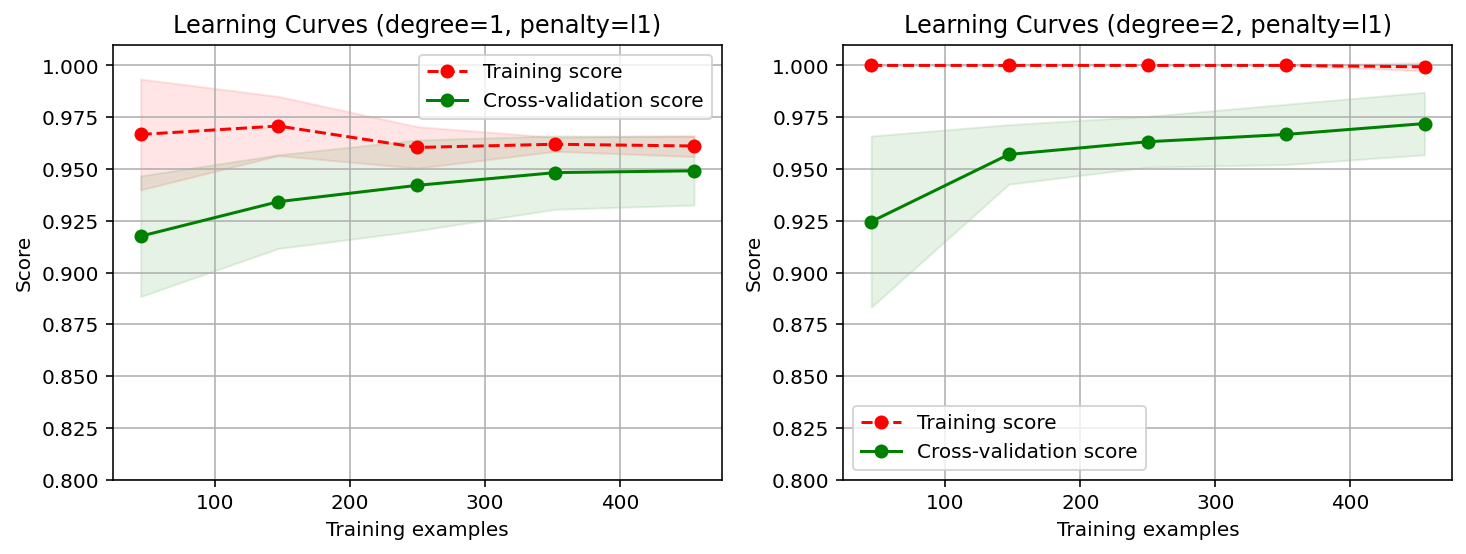

In [12]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

start = time.perf_counter()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='liblinear', max_iter=300), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.perf_counter()-start))

elaspe: 3.542755


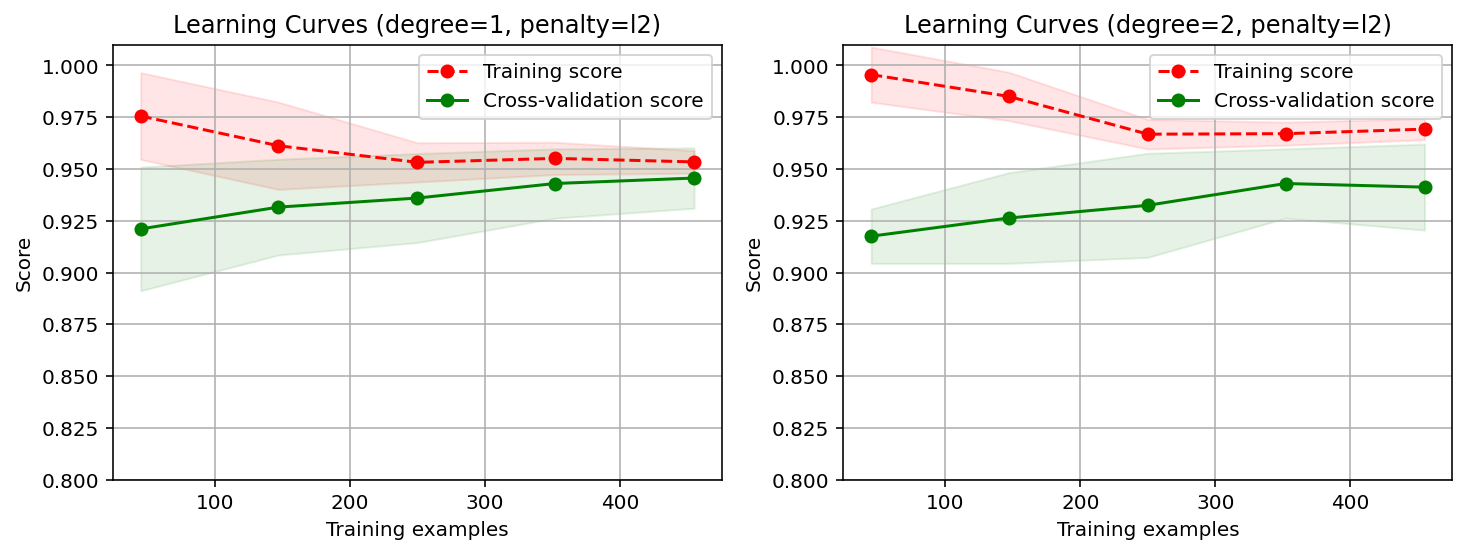

In [13]:
import warnings
warnings.filterwarnings("ignore")

penalty = 'l2'

start = time.perf_counter()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='lbfgs'), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.perf_counter()-start))

**从上面四张图看出，使用二阶多项式并使用L1作为正则项的模型最优（train score最高，cv score也最高）；另外，从图中可以看出train score和cv_score的缝隙还很大，可以通过增加更多数据来进一步优化模型。**

画L1对应的学习曲线时，用时比较长。这是因为学习曲线函数要对模型进行多次训练，计算交叉验证评分的均值。所以，**如果数据集增加100倍或者1000倍，拿出来画学习曲线是场灾难。**

**解决办法是，从大数据集选择一小部分数据（足够说明和对比不同参数下模型的性能）来画学习曲线，等选择好最优模型后，再使用全部数据集训练模型。另外要注意的是，选择小部分数据时，要保持数据分布的一致性，即样本比例的一致性。**

_**以上的思路也可以看做是调参的思路，先选择小部分样本进行调参，缩小范围后，再针对全部数据进行二次调参。类似模拟退火的思路。**_